# Assignment 3
By Shay Culpepper, Data 73500 @ CUNY Grad Center

In [14]:
import pandas as pd
from pandas.io.json import json_normalize
data = pd.read_json('https://data.cityofchicago.org/resource/kn9c-c2s2.json')
data.head()

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [26]:
df = data[['ca', 'community_area_name', 'per_capita_income_','percent_aged_under_18_or_over_64', 'percent_aged_25_without_high_school_diploma']].copy()
df['percent_18_to_64'] = 100 - df['percent_aged_under_18_or_over_64']
df['percent_aged_25_with_hs_or_more'] = 100 - df['percent_aged_25_without_high_school_diploma']
df.head()

,ca,community_area_name,per_capita_income_,percent_aged_under_18_or_over_64,percent_aged_25_without_high_school_diploma,percent_18_to_64,percent_aged_25_with_hs_or_more
0,1.0,Rogers Park,23939,27.5,18.2,72.5,81.8
1,2.0,West Ridge,23040,38.5,20.8,61.5,79.2
2,3.0,Uptown,35787,22.2,11.8,77.8,88.2
3,4.0,Lincoln Square,37524,25.5,13.4,74.5,86.6
4,5.0,North Center,57123,26.2,4.5,73.8,95.5


In [27]:
df.to_csv('./chicago_data.csv')

In [28]:
df.sort_values('percent_aged_25_with_hs_or_more', ascending=False)

,ca,community_area_name,per_capita_income_,percent_aged_under_18_or_over_64,percent_aged_25_without_high_school_diploma,percent_18_to_64,percent_aged_25_with_hs_or_more
7,8.0,Near North Side,88669,22.6,2.5,77.4,97.5
5,6.0,Lake View,60058,17.0,2.6,83.0,97.4
31,32.0,Loop,65526,13.5,3.1,86.5,96.9
6,7.0,Lincoln Park,71551,21.5,3.6,78.5,96.4
71,72.0,Beverly,39523,40.5,3.7,59.5,96.3
...,...,...,...,...,...,...,...
60,61.0,New City,12765,38.9,41.5,61.1,58.5
19,20.0,Hermosa,15089,36.4,41.6,63.6,58.4
57,58.0,Brighton Park,13089,39.3,45.1,60.7,54.9
62,63.0,Gage Park,12171,38.8,51.5,61.2,48.5


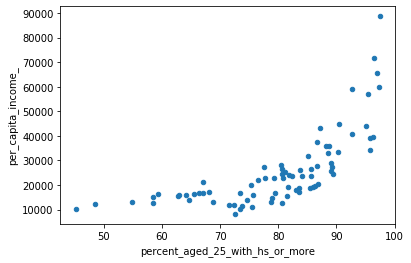

In [29]:
df.plot.scatter('percent_aged_25_with_hs_or_more', 'per_capita_income_')

As is to be expected, there is a possitive correlation between the percentage of residents who have more than a high school diploma and per capita income. This is perhaps obvious since 1) Those with more education tend to have more earning power and 2) Children whose parents have more wealth have a tendency to go further in school.                

I don't find this dataset particularly interesting. I suppose another question that could be posed is how the number of children and elderly folks effect the per capita income. 